In [180]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 50)

In [181]:
df = pd.read_csv(r'../data/DoE_part2_data.csv')

In [182]:
df.head() #looks like a random column unnamed: 0 could be dropped

,Unnamed: 0,ID,LONG,LAT,ages,race,sex,income,Location,Price,Experience,Other,will_attend
0,1,34,-78.573908,35.790983,48.348342,Black,M,<25k,1,4,3,3,0
1,2,159,-78.658352,35.803606,26.371383,White,F,75-100k,5,2,1,3,0
2,3,280,-78.663104,35.819915,34.121603,White,F,25-50k,1,1,2,1,0
3,4,423,-78.521571,35.891935,43.571950,White,M,25-50k,3,1,3,4,1
4,5,932,-78.646293,35.821340,36.240983,Hispanic,F,25-50k,4,3,1,4,0


In [183]:
df.drop('Unnamed: 0', inplace=True, axis=1)

In [184]:
df.info() # no mmissing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6802 entries, 0 to 6801
Data columns (total 12 columns):
ID             6802 non-null int64
LONG           6802 non-null float64
LAT            6802 non-null float64
ages           6802 non-null float64
race           6802 non-null object
sex            6802 non-null object
income         6802 non-null object
Location       6802 non-null int64
Price          6802 non-null int64
Experience     6802 non-null int64
Other          6802 non-null int64
will_attend    6802 non-null int64
dtypes: float64(3), int64(6), object(3)
memory usage: 637.8+ KB


In [185]:
df.describe()

,ID,LONG,LAT,ages,Location,Price,Experience,Other,will_attend
count,6.802000e+03,6802.000000,6802.000000,6802.000000,6802.000000,6802.000000,6802.000000,6802.000000,6802.000000
mean,7.510027e+05,-78.760288,35.839948,42.177065,3.052632,2.473684,1.842105,2.421053,0.058806
std,4.330180e+05,0.157984,0.120887,7.715904,1.431839,1.141109,0.812020,1.091472,0.235279
min,3.400000e+01,-79.228282,35.444594,22.452138,1.000000,1.000000,1.000000,1.000000,0.000000
25%,3.771328e+05,-78.873875,35.756349,36.671926,2.000000,1.000000,1.000000,1.000000,0.000000
50%,7.437685e+05,-78.756112,35.827054,41.585939,3.000000,2.000000,2.000000,2.000000,0.000000
75%,1.127228e+06,-78.634398,35.936086,47.005610,4.000000,4.000000,3.000000,3.000000,0.000000
max,1.507280e+06,-78.384012,36.184802,78.734115,5.000000,4.000000,3.000000,4.000000,1.000000


In [186]:
# listing of our different variable types: categorical, target
cat_vars = ['Location', 'Price', 'Experience', 'Other', 'race', 'sex',
                   'income']
target_col = 'will_attend'
int_vars = ['ages', 'Price', 'will_attend']

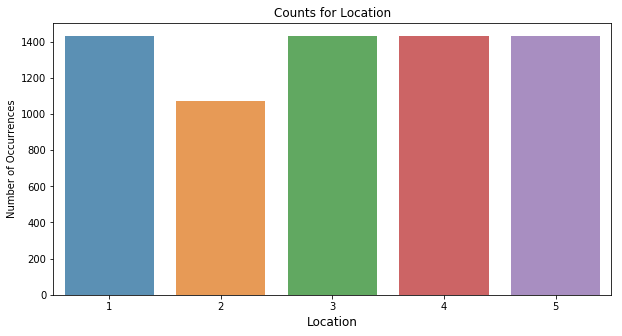

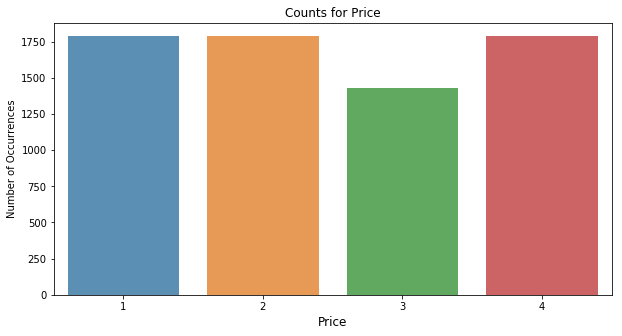

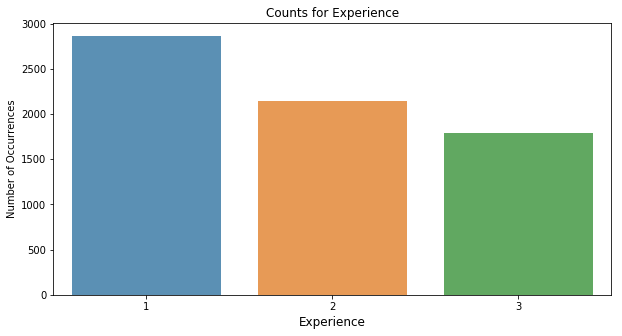

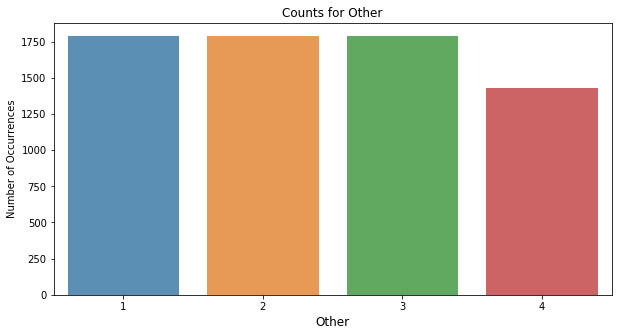

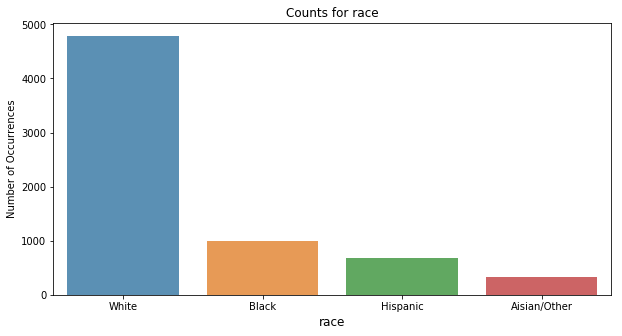

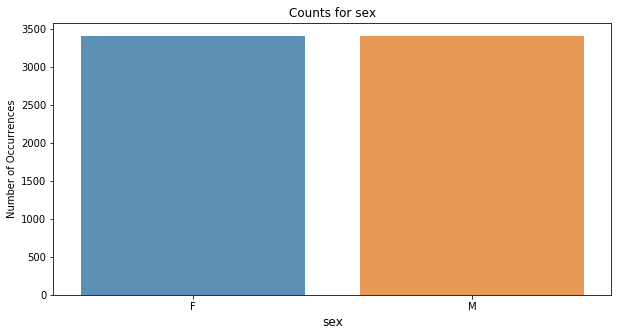

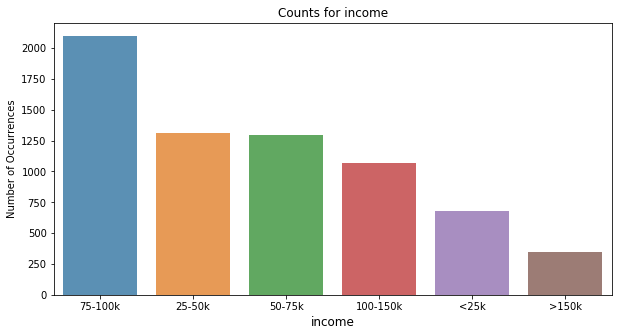

In [187]:
# to give an idea of what we asked people on the surveys
for i, col in enumerate(cat_vars):
    df1 = df[col]
    counts = df1.value_counts()
    plt.figure(figsize=(10,5))
    sns.barplot(counts.index, counts.values, alpha=0.8)
    plt.title('Counts for ' + cat_vars[i])
    plt.ylabel('Number of Occurrences')
    plt.xlabel(cat_vars[i], fontsize=12)
    plt.show()

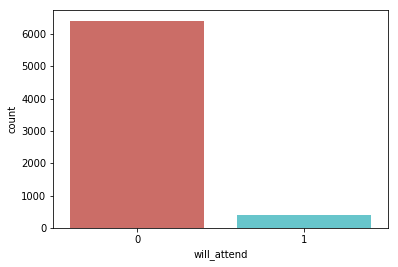

In [188]:
sns.countplot(x=target_col, data=df, palette='hls')
plt.show() # plot of who said they would attend

In [189]:
count_no_sub = len(df[df[target_col]==0])
count_sub = len(df[df[target_col]==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of not attending is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of attending", pct_of_sub*100) # a look at what proportion said they would attend

percentage of not attending is 94.11937665392531
percentage of attending 5.8806233460746835


In [190]:
df.groupby(target_col)[int_vars].mean()
# age of those who attend is about 3 years younger on average
# those attending responded better to lower prices

,ages,Price,will_attend
will_attend,,,
0,42.375401,2.489691,0.0
1,39.002687,2.217500,1.0


In [191]:
# break down descriptive stats for different groupings
for col in cat_vars: # ages, Price, will_attend are really the only meaningful columns below
    display(df.groupby(col)[int_vars].mean())

,ages,Price,will_attend
Location,,,
1,41.802011,2.500000,0.067737
2,42.457151,2.333333,0.119181
3,42.496625,2.500000,0.081006
4,42.256221,2.500000,0.000000
5,41.943337,2.500000,0.041201


,ages,Price,will_attend
Price,,,
1,42.339579,1.0,0.070391
2,42.172429,2.0,0.085475
3,42.231970,3.0,0.020251
4,41.975262,4.0,0.051397


,ages,Price,will_attend
Experience,,,
1,42.205278,2.5,0.027235
2,42.023114,2.5,0.025140
3,42.316666,2.4,0.149721


,ages,Price,will_attend
Other,,,
1,41.946114,2.2,0.017877
2,42.438429,2.8,0.012291
3,42.142397,2.4,0.088827
4,42.182383,2.5,0.130587


,ages,Price,will_attend
race,,,
Aisian/Other,42.503434,2.526946,0.053892
Black,41.935304,2.487487,0.056056
Hispanic,42.485812,2.472914,0.064422
White,42.160691,2.467196,0.058922


,ages,Price,will_attend
sex,,,
F,42.284576,2.493831,0.059929
M,42.069364,2.453502,0.057681


,ages,Price,will_attend
income,,,
100-150k,41.962172,2.511693,0.077643
25-50k,42.177333,2.438838,0.056575
50-75k,42.462852,2.496148,0.051618
75-100k,42.009440,2.453549,0.058123
<25k,42.347413,2.441003,0.047198
>150k,42.447826,2.588571,0.062857


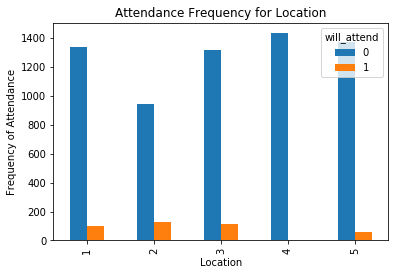

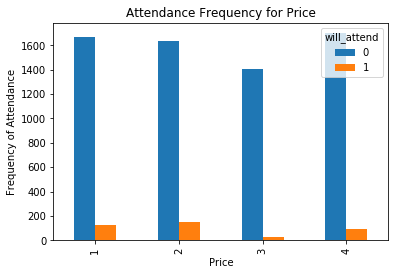

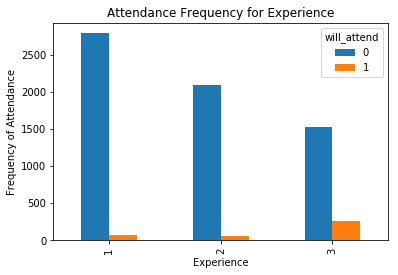

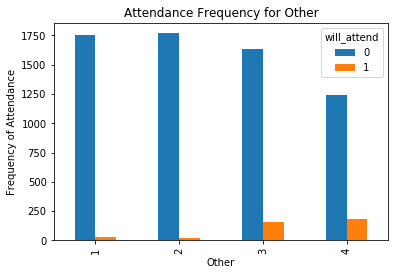

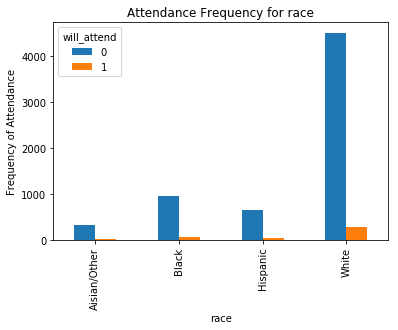

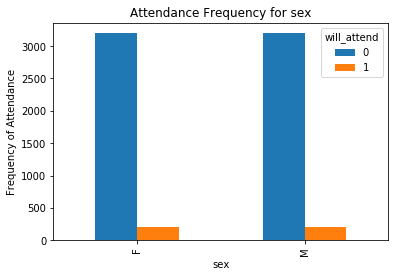

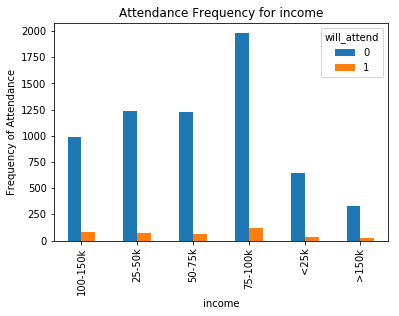

In [175]:
%matplotlib inline
for col in cat_vars:
    pd.crosstab(df[col], df[target_col]).plot(kind='bar')
    plt.title('Attendance Frequency for ' + col)
    plt.xlabel(col)
    plt.ylabel('Frequency of Attendance')
# locations 1 2 3 are the most popular
# price 2 is most popular
# experience 3 is most popular
# others 3 4 are the most popular

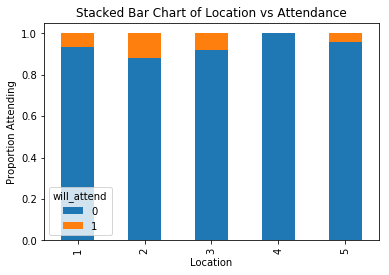

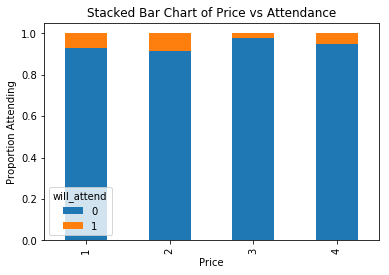

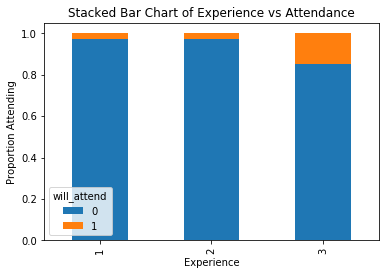

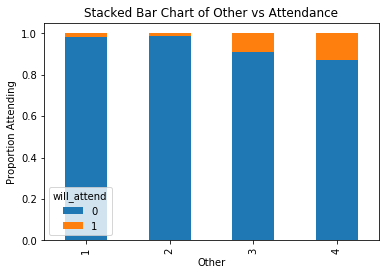

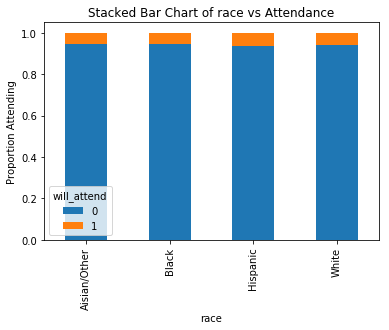

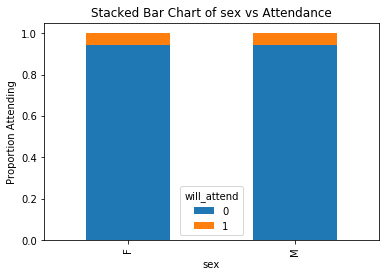

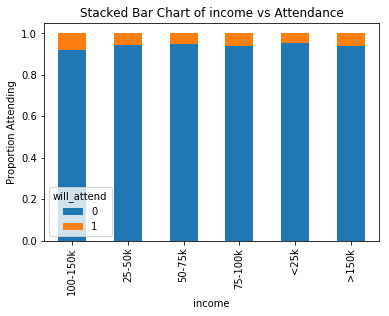

In [176]:
# visualizes the same thing as above but in a different way
for col in cat_vars:
    table = pd.crosstab(df[col], df[target_col])
    table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
    plt.title('Stacked Bar Chart of ' + col + ' vs Attendance')
    plt.xlabel(col)
    plt.ylabel('Proportion Attending')

Text(0,0.5,'Frequency')

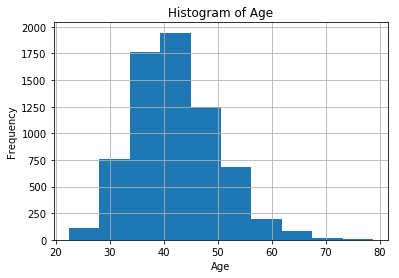

In [177]:
df['ages'].hist() # most people between 35-50 years old
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency') 

In [178]:
# one hot encoding
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(df[var], prefix=var)
    df1=df.join(cat_list)
    df=df1

In [179]:
df.head() # taking a look at how the one hot encoding worked out

,ID,LONG,LAT,ages,race,sex,income,Location,Price,Experience,Other,will_attend,Location_1,Location_2,Location_3,Location_4,Location_5,Price_1,Price_2,Price_3,Price_4,Experience_1,Experience_2,Experience_3,Other_1,Other_2,Other_3,Other_4,race_Aisian/Other,race_Black,race_Hispanic,race_White,sex_F,sex_M,income_100-150k,income_25-50k,income_50-75k,income_75-100k,income_<25k,income_>150k
0,34,-78.573908,35.790983,48.348342,Black,M,<25k,1,4,3,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0
1,159,-78.658352,35.803606,26.371383,White,F,75-100k,5,2,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0
2,280,-78.663104,35.819915,34.121603,White,F,25-50k,1,1,2,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0
3,423,-78.521571,35.891935,43.571950,White,M,25-50k,3,1,3,4,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0
4,932,-78.646293,35.821340,36.240983,Hispanic,F,25-50k,4,3,1,4,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0


In [ ]:
#adding eucledian distance to dataframe for each indivudal and each location
Loc1 = [-78.878130,35.89314]
Loc2 = [-78.875880,35.74628]
Loc3 = [-78.676540,35.7724]
Loc4 = [-79.054280,35.90535]
Loc5 = [-78.575981,35.86696]

df['distL1'] = (df[['LONG', 'LAT']] - np.array(Loc1)).pow(2).sum(1).pow(0.5)
df['distL2'] = (df[['LONG', 'LAT']] - np.array(Loc2)).pow(2).sum(1).pow(0.5)
df['distL3'] = (df[['LONG', 'LAT']] - np.array(Loc3)).pow(2).sum(1).pow(0.5)
df['distL4'] = (df[['LONG', 'LAT']] - np.array(Loc4)).pow(2).sum(1).pow(0.5)
df['distL5'] = (df[['LONG', 'LAT']] - np.array(Loc5)).pow(2).sum(1).pow(0.5)